In [1]:
#import library
import os
import requests
import pandas as pd
import time
import datetime
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:

file_path = r'C:\Users\USER\Downloads\data 1.csv'

try:
    # Read CSV file into DataFrame
    year_yields = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file at path {file_path} was not found.")
    year_yields = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    year_yields = None

if year_yields is not None:
    # Rename the 'Close' column to 'Close 10 year in %'
    year_yields = year_yields.rename(columns={'Close':'Close 10 year in %'})
    year_yields['Close 10 year in %'] = year_yields['Close 10 year in %'].str.rstrip('%').astype(float)
    print(year_yields['Close 10 year in %'].dtypes)   
# Display the first few rows of the DataFrame
    print(year_yields.head())
else:
    print("No data to display.")


float64
         Date    Open    High     Low  Close 10 year in %
0  05/21/2024  4.176%  4.176%  4.123%               4.127
1  05/20/2024  4.132%  4.182%  4.119%               4.176
2  05/17/2024  4.087%  4.137%  4.083%               4.132
3  05/16/2024  4.069%  4.088%  4.043%               4.087
4  05/15/2024  4.174%  4.174%  4.056%               4.069


In [6]:
import pandas as pd

file_path = r'C:\Users\USER\Downloads\Download Data - BOND_BX_XTUP_TMBMKGB-02Y.csv'

try:
    # Read CSV file into DataFrame
    year_yields_two = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file at path {file_path} was not found.")
    year_yields_two = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    year_yields_two = None

if year_yields_two is not None:
    # Rename the 'Close' column to 'Close 2 year'
    year_yields_two = year_yields_two.rename(columns={'Close': 'Close 2 year in %'})
    

    # Remove percentage signs and convert to float
    year_yields_two['Close 2 year in %'] = year_yields_two['Close 2 year in %'].str.rstrip('%').astype(float)
    
    # Display the data type to confirm the conversion
    print(year_yields_two['Close 2 year in %'].dtypes)
    
    # Display the first few rows again to confirm changes
    print(year_yields_two.head())
else:
    print("No data to display.")




float64
         Date    Open    High     Low  Close 2 year in %
0  05/21/2024  4.362%  4.362%  4.303%              4.307
1  05/20/2024  4.313%  4.368%  4.298%              4.362
2  05/17/2024  4.280%  4.329%  4.276%              4.313
3  05/16/2024  4.245%  4.280%  4.221%              4.280
4  05/15/2024  4.318%  4.318%  4.219%              4.245


In [11]:
year_yields['Close 10 year in %'] = pd.to_numeric(year_yields['Close 10 year in %'], errors='coerce')
year_yields_two['Close 2 year in %'] = pd.to_numeric(year_yields_two['Close 2 year in %'], errors='coerce')
# Ensure both DataFrames are aligned by 'Date'
merged_yields = pd.merge(year_yields, year_yields_two, on='Date')

# Calculate the difference between 10-year and 2-year yields
merged_yields['Yield Difference'] = merged_yields['Close 2 year in %'] - merged_yields['Close 10 year in %']

# Display the result
print(merged_yields[['Yield Difference']])



     Yield Difference
0               0.180
1               0.186
2               0.181
3               0.193
4               0.176
..                ...
97              0.438
98              0.472
99              0.458
100             0.418
101             0.436

[102 rows x 1 columns]


In [22]:
# fred api 
#api_key = fred_key
api_key = 'a171575828f87d078d67eac02e316684' # where you input your Api key 

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

'''
Get observation data from the FRED API
'''

# Assign endpoint
obs_endpoint = 'series/observations'

# Assign parameters
series_id = 'BAMLC0A4CBBB' # for the series_id
start_date = '2024-01-01' # for the start date 
end_date = '2024-05-21'   # for the end date 
ts_frequency = 'd'    # for the frequency 
ts_units = 'pca'       # to get the unit of the data 

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency,
    'units': ts_units
}

# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)
data = response.json()['observations']
df1 = pd.DataFrame(data)

print(df1)

    realtime_start realtime_end        date        value
0       2024-06-03   2024-06-03  2024-01-01            .
1       2024-06-03   2024-06-03  2024-01-02            .
2       2024-06-03   2024-06-03  2024-01-03  35933.85315
3       2024-06-03   2024-06-03  2024-01-04      0.00000
4       2024-06-03   2024-06-03  2024-01-05    -85.73804
..             ...          ...         ...          ...
98      2024-06-03   2024-06-03  2024-05-15      0.00000
99      2024-06-03   2024-06-03  2024-05-16    -90.28845
100     2024-06-03   2024-06-03  2024-05-17      0.00000
101     2024-06-03   2024-06-03  2024-05-20    -90.49125
102     2024-06-03   2024-06-03  2024-05-21      0.00000

[103 rows x 4 columns]


In [16]:
import pandas as pd
import datetime
import time

# Function to fetch data for a given ticker
def fetch_ticker_data(ticker, start_date, end_date, interval='1d'):
    # Convert dates to Unix timestamps
    period1 = int(time.mktime(start_date.timetuple()))
    period2 = int(time.mktime(end_date.timetuple()))

    # Construct the query URL with the specified interval, start date, and end date
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history'

    # Read the data from Yahoo Finance
    try:
        ticker_data = pd.read_csv(query_string)
        return ticker_data
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Set start and end dates
start_date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 5, 21)

# List of tickers
tickers = ['BLND.L', 'LAND.L', 'GPE.L']

# Fetch data for each ticker and store in a list
data_frames = []
for ticker in tickers:
    data = fetch_ticker_data(ticker, start_date, end_date)
    if data is not None:
        data_frames.append(data)

# Check if we have data for all tickers
if len(data_frames) != len(tickers):
    print("Failed to fetch data for some tickers.")
else:
    # Extract 'Adj Close' column from each DataFrame and rename it
    adj_close_frames = [df[['Date', 'Adj Close']].rename(columns={'Adj Close': f'Adj Close {ticker}'}) for df, ticker in zip(data_frames, tickers)]
    
    # Merge all DataFrames on the 'Date' column
    merged_data = adj_close_frames[0]
    for df in adj_close_frames[1:]:
        merged_data = pd.merge(merged_data, df, on='Date')
    
    # Calculate the average of adjusted close prices
    merged_data['Average Adj Close'] = merged_data[[f'Adj Close {ticker}' for ticker in tickers]].mean(axis=1)
    
    # Display the merged DataFrame with average adjusted close prices
    print(merged_data[['Date', 'Average Adj Close']])


          Date  Average Adj Close
0   2024-01-02         502.637848
1   2024-01-03         496.919291
2   2024-01-04         498.129751
3   2024-01-05         497.015015
4   2024-01-08         502.897196
..         ...                ...
92  2024-05-14         493.466014
93  2024-05-15         504.939952
94  2024-05-16         504.817749
95  2024-05-17         497.891835
96  2024-05-20         471.059367

[97 rows x 2 columns]


In [21]:
#yahoo finance 
ticker = 'LGEN.L' # where to set the ticker
interval = '1d'  # where to set the frequency of the data 

# Set start and end dates
start_date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 5, 21)

# Convert dates to Unix timestamps
period1 = int(time.mktime(start_date.timetuple()))
period2 = int(time.mktime(end_date.timetuple()))

# Construct the query URL with the specified interval, start date, and end date
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?interval={interval}&period1={period1}&period2={period2}'

# Read the data from Yahoo Finance
yahoo_data = pd.read_csv(query_string)

# Save the DataFrame to a CSV file
#yahoo_data.to_csv('yahoo_data.csv', index=False)

# Print the DataFrame
print(yahoo_data)

          Date        Open        High         Low       Close   Adj Close  \
0   2024-01-02  250.899994  252.500000  247.100006  248.500000  233.875885   
1   2024-01-03  248.100006  249.800003  243.199997  244.399994  230.017166   
2   2024-01-04  243.699997  246.899994  243.699997  246.199997  231.711227   
3   2024-01-05  244.399994  245.022003  241.399994  243.800003  229.452484   
4   2024-01-08  244.600006  250.699997  244.498993  250.600006  235.852310   
..         ...         ...         ...         ...         ...         ...   
92  2024-05-14  245.500000  246.100006  242.500000  245.199997  245.199997   
93  2024-05-15  247.000000  252.199997  243.699997  251.800003  251.800003   
94  2024-05-16  252.699997  254.707993  247.500000  254.699997  254.699997   
95  2024-05-17  254.199997  254.699997  249.000000  252.800003  252.800003   
96  2024-05-20  252.899994  253.800003  251.815994  252.899994  252.899994   

      Volume  
0    7541483  
1   11044902  
2    6999415  
3  

In [26]:
# Assuming you have two data frames df1 and df2

# Extract the columns you want to combine
column_from_year_yields = year_yields['Close 10 year in %']
column_from_merged_yields = merged_yields['Yield Difference']
column_from_df1 = df1['value']
column_from_merged_data = merged_data['Average Adj Close']
column_from_yahoo_data = yahoo_data['Adj Close']
# Combine the columns horizontally
combined_df = pd.concat([column_from_year_yields,column_from_merged_yields,column_from_df1,column_from_merged_data,column_from_yahoo_data], axis=1)
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

columns_to_exclude = ['value']  # Add your columns to exclude here

# Calculate rate of change for all columns except excluded ones
columns_to_change = combined_df.columns.difference(columns_to_exclude)
combined_df[columns_to_change] = combined_df[columns_to_change].apply(pd.to_numeric, errors='coerce')
combined_df[columns_to_change] = combined_df[columns_to_change].pct_change()

# Replace NaN values in selected columns with 0
combined_df[columns_to_change].fillna(0, inplace=True)
combined_df.fillna(0, inplace=True)
# Now you have the combined DataFrame
print(combined_df)

     Close 10 year in %  Yield Difference        value  Average Adj Close  \
0              0.000000          0.000000      0.00000           0.000000   
1              0.011873          0.033333      0.00000          -0.011377   
2             -0.010536         -0.026882  35933.85315           0.002436   
3             -0.010891          0.066298      0.00000          -0.002238   
4             -0.004404         -0.088083    -85.73804           0.011835   
..                  ...               ...          ...                ...   
98            -0.016082          0.077626      0.00000           0.000000   
99            -0.024652         -0.029661    -90.28845           0.000000   
100            0.001648         -0.087336      0.00000           0.000000   
101           -0.029347          0.043062    -90.49125           0.000000   
102            0.000000          0.000000      0.00000           0.000000   

     Adj Close  
0     0.000000  
1    -0.016499  
2     0.007365  
3    -0

C:\Users\USER\AppData\Local\Temp\ipykernel_2104\3729333151.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[columns_to_change].fillna(0, inplace=True)


In [27]:
# Assuming you have combined_df DataFrame and dropped NaN values

# Perform ADF test for each column
for column_name in combined_df.columns:
    result = adfuller(combined_df[column_name], autolag='AIC')
    
    # Extract results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Print results
    print(f'ADF Statistic for {column_name}: {adf_statistic}')
    print(f'p-value for {column_name}: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    print('\n')


ADF Statistic for Close 10 year in %: -5.626954964215035
p-value for Close 10 year in %: 1.1117530813668972e-06
Critical Values:
   1%: -3.497501033
   5%: -2.89090644
   10%: -2.5824349


ADF Statistic for Yield Difference: -10.2863971931093
p-value for Yield Difference: 3.665349604126742e-18
Critical Values:
   1%: -3.4961490537199116
   5%: -2.8903209639580556
   10%: -2.5821223452518263


ADF Statistic for value: -9.20073481699026
p-value for value: 2.005355259713375e-15
Critical Values:
   1%: -3.4961490537199116
   5%: -2.8903209639580556
   10%: -2.5821223452518263


ADF Statistic for Average Adj Close: -10.158719670915948
p-value for Average Adj Close: 7.607434895067388e-18
Critical Values:
   1%: -3.4961490537199116
   5%: -2.8903209639580556
   10%: -2.5821223452518263


ADF Statistic for Adj Close: -6.8237339740232
p-value for Adj Close: 1.9719083007680946e-09
Critical Values:
   1%: -3.4968181663902103
   5%: -2.8906107514600103
   10%: -2.5822770483285953




Correlation Matrix:
                    Close 10 year in %  Yield Difference     value  \
Close 10 year in %            1.000000         -0.098261  0.040965   
Yield Difference             -0.098261          1.000000 -0.047831   
value                         0.040965         -0.047831  1.000000   
Average Adj Close            -0.037334         -0.084540 -0.030879   
Adj Close                    -0.020278         -0.065038 -0.006261   

                    Average Adj Close  Adj Close  
Close 10 year in %          -0.037334  -0.020278  
Yield Difference            -0.084540  -0.065038  
value                       -0.030879  -0.006261  
Average Adj Close            1.000000   0.645367  
Adj Close                    0.645367   1.000000  


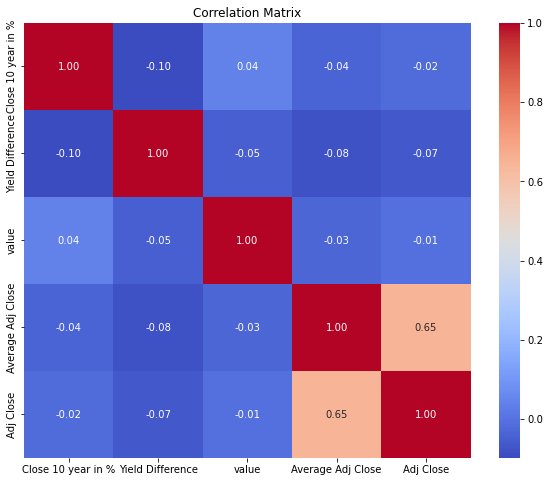

In [28]:
# Compute correlation matrix
correlation_matrix = combined_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [31]:
import pandas as pd
import statsmodels.api as sm

# Assuming you already have the combined_df DataFrame prepared
# Ensure all columns are numeric
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values to ensure the dataset is clean for regression
combined_df.dropna(inplace=True)

# Define the dependent variable 'Adj Close'
dependent_variable = combined_df['Adj Close']

# Define the independent variables (excluding 'Adj Close')
independent_variables = combined_df.drop(columns=['Adj Close'])

# Add a constant to the independent variables (for the intercept term)
independent_variables = sm.add_constant(independent_variables)

# Fit the regression model
model = sm.OLS(dependent_variable, independent_variables).fit()

# Print the summary of the regression model
print(model.summary())

# Extract coefficients
coefficients = model.params

# Construct the regression equation
equation = "Adj Close = "
for idx, coef in enumerate(coefficients):
    if idx == 0:
        equation += f"{coef:.4f} "  # Intercept
    else:
        equation += f"+ ({coef:.4f} * {coefficients.index[idx]}) "

print("Regression Equation:")
print(equation)


                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     17.51
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           7.18e-11
Time:                        13:08:35   Log-Likelihood:                 337.71
No. Observations:                 103   AIC:                            -665.4
Df Residuals:                      98   BIC:                            -652.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0011      0

# General Overview
The output summarizes the results of an Ordinary Least Squares (OLS) regression analysis where the dependent variable is "Adj Close" and the independent variables are "Close 10 year in %", "Yield Difference", "value", and "Average Adj Close".

Key Metrics:
R-squared (0.417): Indicates that approximately 41.7% of the variability in the dependent variable (Adj Close) is explained by the model. This shows a moderate fit.
Adjusted R-squared (0.393): Similar to R-squared but adjusts for the number of predictors in the model. This value is slightly lower, indicating that the model's explanatory power is not solely due to the number of predictors.
F-statistic (17.51): Tests whether the overall regression model is a good fit for the data. A higher value indicates the model is statistically significant.
Prob (F-statistic) (7.18e-11): A very low p-value (< 0.05) indicates that the model is statistically significant, meaning at least one of the predictors is significantly related to the dependent variable.
Coefficients and Significance
const (0.0011): The intercept term, representing the expected value of Adj Close when all predictors are zero. Not statistically significant (p-value: 0.246).
Close 10 year in % (0.0019): The coefficient suggests a very small positive relationship with Adj Close. Not statistically significant (p-value: 0.976).
Yield Difference (-0.0005): The coefficient suggests a very small negative relationship with Adj Close. Not statistically significant (p-value: 0.902).
value (2.389e-08): The coefficient is effectively zero, indicating no practical impact on Adj Close. Not statistically significant (p-value: 0.866).
Average Adj Close (0.5785): Indicates a strong positive relationship with Adj Close. This is statistically significant (p-value: 0.000), meaning this predictor is significantly associated with the dependent variable.
Diagnostic Metrics
Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB): Tests for normality of residuals. Non-significant p-values indicate that residuals are normally distributed.
Durbin-Watson (2.355): Tests for autocorrelation in residuals. A value close to 2 suggests no autocorrelation.
Condition Number (5.12e+05): Indicates potential multicollinearity issues. A high condition number suggests that some predictors may be highly correlated.
Regression Equation
The regression equation based on the coefficients is:

{Adj Close} = 0.0011 + (0.0019 \times {Close 10 year in %}) + (-0.0005 \times {Yield Difference}) + (0.0000 \times \{value}) + (0.5785 \times \text{Average Adj Close})

Interpretation of the Regression Model
Significant Predictors: Only "Average Adj Close" has a statistically significant impact on "Adj Close". The other variables do not significantly contribute to the model.
Model Fit: With an R-squared of 0.417, the model explains a moderate proportion of the variance in "Adj Close". However, the significant predictor indicates that most of this explanatory power comes from "Average Adj Close".
Multicollinearity: The high condition number suggests there might be multicollinearity. This could affect the stability of the coefficient estimates. Checking variance inflation factors (VIF) for each predictor could provide more insights into multicollinearity.
Summary
The regression model indicates that "Average Adj Close" is a significant predictor of "Adj Close", while other variables are not significant. The model explains about 41.7% of the variance in the dependent variable. Despite the moderate R-squared, the presence of potential multicollinearity should be further investigated to ensure the robustness of the model.